In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('project3_dataset.csv')

# Display my DataFrame
df.head()



,Age,Gender,RelationshipStatus,Occupation,Organization,SocialMedia,SocialMediaPlatforms,NumberofSocialMediaPlatforms,HoursSpent,Frequency,Distraction,Restlessness,Anxiety,ConcentrationDifficulty,SelfComparision,PostSentiment,ValidationSeeking,Depression,ActivityInterest Variance,Sleeplessness
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,2 to 5,5,3,2,2,5,2,3,2,5,4,5
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,More than 5,4,3,2,5,4,5,1,1,5,4,5
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",4,2 to 5,2,2,1,5,4,3,3,1,4,2,5
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",2,More than 5,3,2,1,5,3,5,1,2,4,3,2
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",3,2 to 5,4,5,4,5,5,3,3,3,4,4,1


In [2]:
# Check for missing values in each column
missing_values = df.isnull().any()

# Print columns with missing values
print(missing_values[missing_values == True])

Series([], dtype: bool)


In [3]:
# Rename columns
df = df.rename(columns={'Age ': 'Age', 'Occupation ': 'Occupation'})

# Now you can check the column names to verify the change
print(df.columns)

Index(['Age', 'Gender', 'RelationshipStatus', 'Occupation', 'Organization',
       'SocialMedia', 'SocialMediaPlatforms', 'NumberofSocialMediaPlatforms',
       'HoursSpent', 'Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness'],
      dtype='object')


In [4]:
#List all my columns 
print(df.columns)

Index(['Age', 'Gender', 'RelationshipStatus', 'Occupation', 'Organization',
       'SocialMedia', 'SocialMediaPlatforms', 'NumberofSocialMediaPlatforms',
       'HoursSpent', 'Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness'],
      dtype='object')


In [6]:
# Create a list of all unique social media platforms
all_platforms = set()
for platforms in df['SocialMediaPlatforms'].str.split(', '):
    all_platforms.update(platforms)

# Create new binary columns for each platform
for platform in all_platforms:
    df[platform] = df['SocialMediaPlatforms'].str.contains(platform).astype(int)

In [7]:
print(df.columns)

Index(['Age', 'Gender', 'RelationshipStatus', 'Occupation', 'Organization',
       'SocialMedia', 'SocialMediaPlatforms', 'NumberofSocialMediaPlatforms',
       'HoursSpent', 'Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness', 'TikTok', 'Instagram', 'Twitter', 'Pinterest',
       'Discord', 'Facebook', 'Reddit', 'YouTube', 'Snapchat'],
      dtype='object')


In [8]:
df.head()

,Age,Gender,RelationshipStatus,Occupation,Organization,SocialMedia,SocialMediaPlatforms,NumberofSocialMediaPlatforms,HoursSpent,Frequency,...,Sleeplessness,TikTok,Instagram,Twitter,Pinterest,Discord,Facebook,Reddit,YouTube,Snapchat
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,2 to 5,5,...,5,0,1,1,0,1,1,1,1,0
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,More than 5,4,...,5,0,1,1,0,1,1,1,1,0
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",4,2 to 5,2,...,5,0,1,0,1,0,1,0,1,0
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",2,More than 5,3,...,2,0,1,0,0,0,1,0,0,0
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",3,2 to 5,4,...,1,0,1,0,0,0,1,0,1,0


In [9]:
# Drop duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Display the updated DataFrame Columns
print(df.columns)

Index(['Age', 'Gender', 'RelationshipStatus', 'Occupation', 'Organization',
       'SocialMedia', 'SocialMediaPlatforms', 'NumberofSocialMediaPlatforms',
       'HoursSpent', 'Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness', 'TikTok', 'Instagram', 'Twitter', 'Pinterest',
       'Discord', 'Facebook', 'Reddit', 'YouTube', 'Snapchat'],
      dtype='object')


In [10]:
df = df.join(pd.get_dummies(df['HoursSpent']).astype(int))

In [11]:
# Rename columns
df = df.rename(columns={'Less than 2 ': 'Less than 2hrs', '2 to 5': '2 to 5 hrs', 'More than 5 ' : 'More than 5 hrs'})

In [12]:
print(df.columns)

Index(['Age', 'Gender', 'RelationshipStatus', 'Occupation', 'Organization',
       'SocialMedia', 'SocialMediaPlatforms', 'NumberofSocialMediaPlatforms',
       'HoursSpent', 'Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness', 'TikTok', 'Instagram', 'Twitter', 'Pinterest',
       'Discord', 'Facebook', 'Reddit', 'YouTube', 'Snapchat', '2 to 5 hrs',
       'Less than 2hrs', 'More than 5 hrs'],
      dtype='object')


In [ ]:
df.head()

# ANALYSIS
## Group the data by Social Media platform and then show relationships for each platform

## FACEBOOK 

In [13]:
# Filter the original DataFrame for rows where the 'Facebook' column is 1 (indicating Facebook usage)
facebook_users = df[df['Facebook'] == 1]

# Select only the mental health-related columns along with 'Age' and 'Gender'
mental_health_columns = ['Age', 'Gender','Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness']

# Create a new DataFrame containing only the Facebook users and the selected columns
facebook_mental_health = facebook_users[mental_health_columns]

# Display the new DataFrame
facebook_mental_health.head()


,Age,Gender,Frequency,Distraction,Restlessness,Anxiety,ConcentrationDifficulty,SelfComparision,PostSentiment,ValidationSeeking,Depression,ActivityInterest Variance,Sleeplessness
0,21.0,Male,5,3,2,2,5,2,3,2,5,4,5
1,21.0,Female,4,3,2,5,4,5,1,1,5,4,5
2,21.0,Female,2,2,1,5,4,3,3,1,4,2,5
3,21.0,Female,3,2,1,5,3,5,1,2,4,3,2
4,21.0,Female,4,5,4,5,5,3,3,3,4,4,1


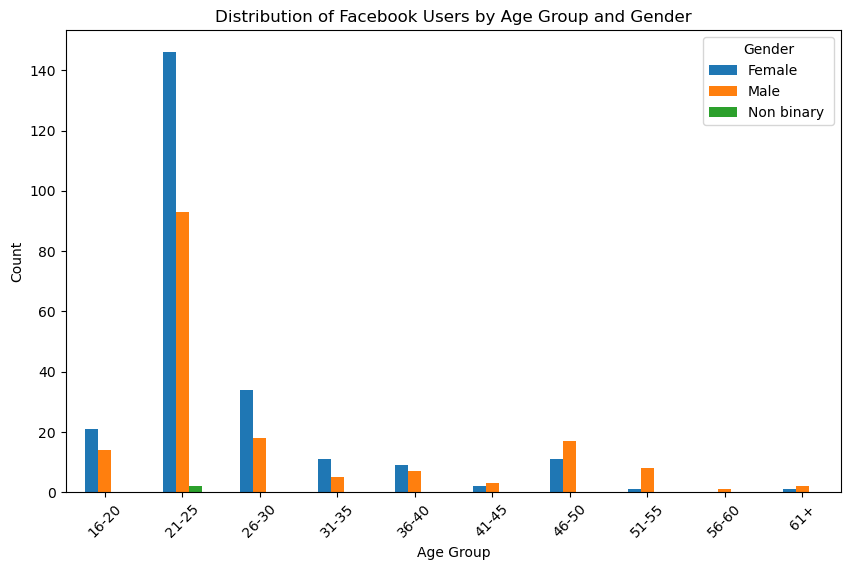

In [14]:
# Define the age categories
age_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, float('inf')]
age_labels = ['16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61+']

# Create a copy of the dataframe to avoid the SettingWithCopyWarning
facebook_users_copy = facebook_users.copy()

# Group the Facebook users by age and gender and count the occurrences
facebook_users_copy['AgeGroup'] = pd.cut(facebook_users_copy['Age'], bins=age_bins, labels=age_labels, right=False)
age_gender_counts = facebook_users_copy.groupby(['AgeGroup', 'Gender']).size().unstack(fill_value=0)

# Plot the bar chart
age_gender_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Facebook Users by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [ ]:
facebook_users.head()


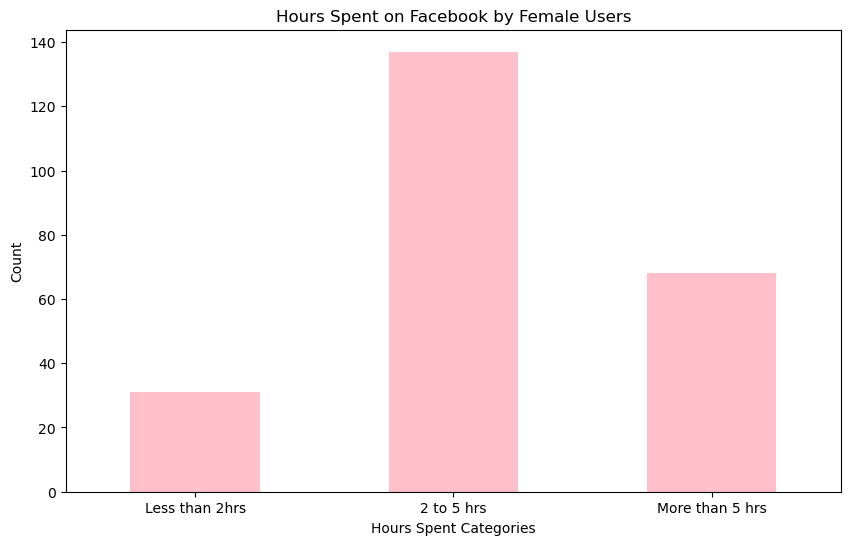

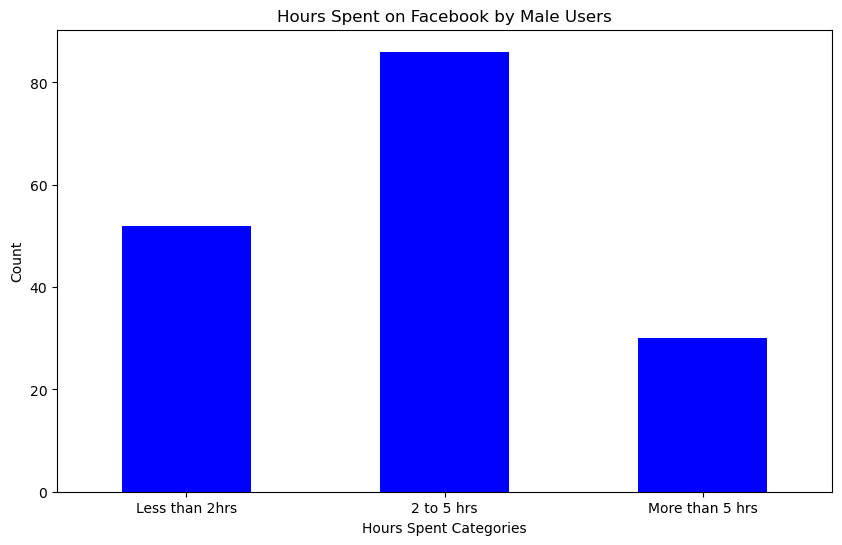

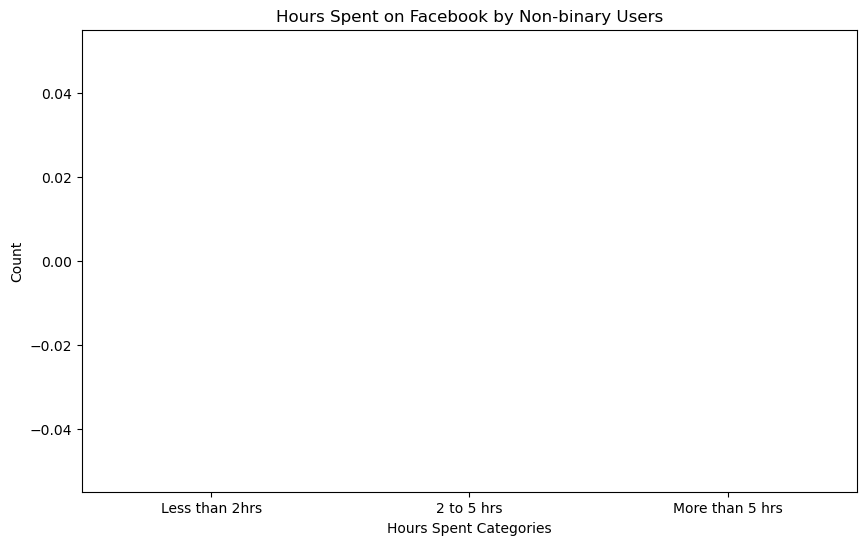

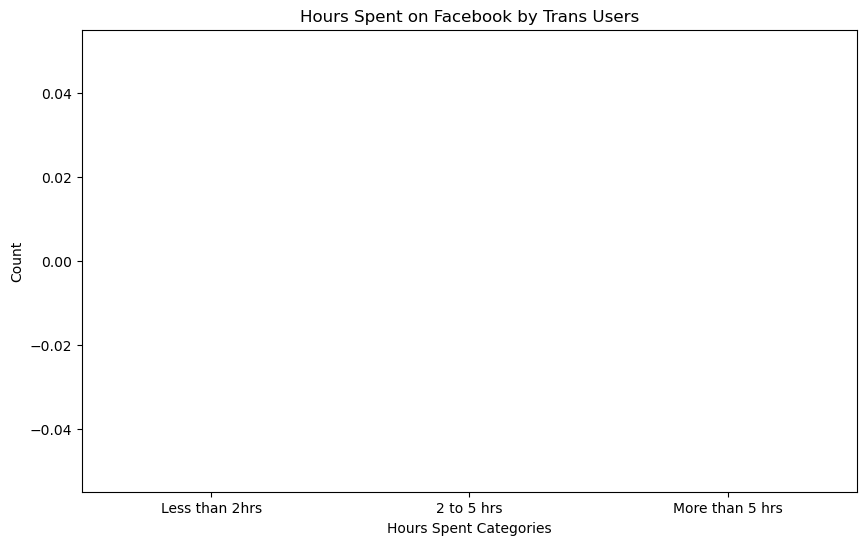

In [15]:
# Plot hours spent on Facebook vs Gender

# Filter the original DataFrame for Facebook users
facebook_users = df[df['Facebook'] == 1]

# Filter Facebook users by gender
female_users = facebook_users[facebook_users['Gender'] == 'Female']
male_users = facebook_users[facebook_users['Gender'] == 'Male']
non_binary_users = facebook_users[facebook_users['Gender'] == 'Non-binary']
trans_users = facebook_users[facebook_users['Gender'] == 'Trans']

# Plot for female users
plt.figure(figsize=(10, 6))
female_users[['Less than 2hrs', '2 to 5 hrs', 'More than 5 hrs']].sum().plot(kind='bar', color='pink')
plt.title('Hours Spent on Facebook by Female Users')
plt.xlabel('Hours Spent Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plot for male users
plt.figure(figsize=(10, 6))
male_users[['Less than 2hrs', '2 to 5 hrs', 'More than 5 hrs']].sum().plot(kind='bar', color='blue')
plt.title('Hours Spent on Facebook by Male Users')
plt.xlabel('Hours Spent Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plot for non-binary users
plt.figure(figsize=(10, 6))
non_binary_users[['Less than 2hrs', '2 to 5 hrs', 'More than 5 hrs']].sum().plot(kind='bar', color='purple')
plt.title('Hours Spent on Facebook by Non-binary Users')
plt.xlabel('Hours Spent Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plot for trans users
plt.figure(figsize=(10, 6))
trans_users[['Less than 2hrs', '2 to 5 hrs', 'More than 5 hrs']].sum().plot(kind='bar', color='green')
plt.title('Hours Spent on Facebook by Trans Users')
plt.xlabel('Hours Spent Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

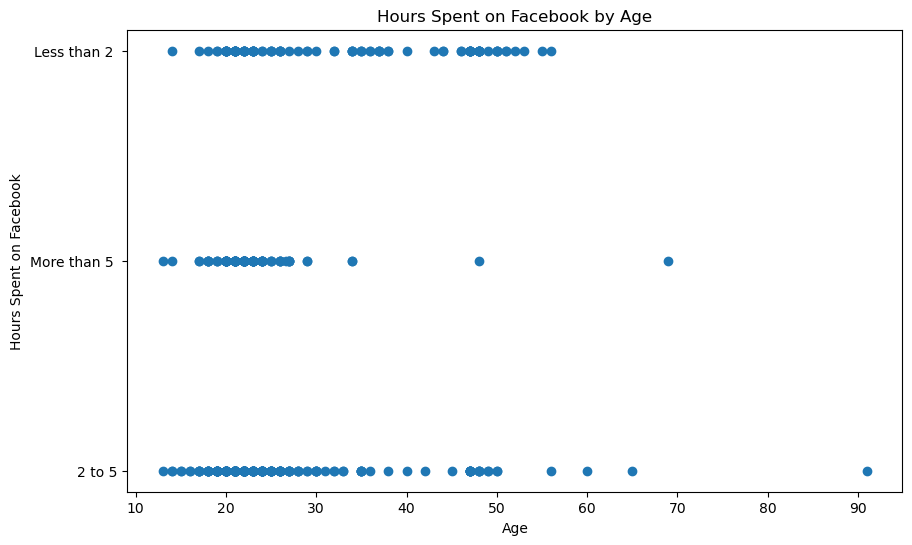

In [16]:
# Plot hours spent on Facebook vs Age
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['HoursSpent'])
plt.xlabel('Age')
plt.ylabel('Hours Spent on Facebook')
plt.title('Hours Spent on Facebook by Age')
plt.show()

# ALL PLATFORMS 

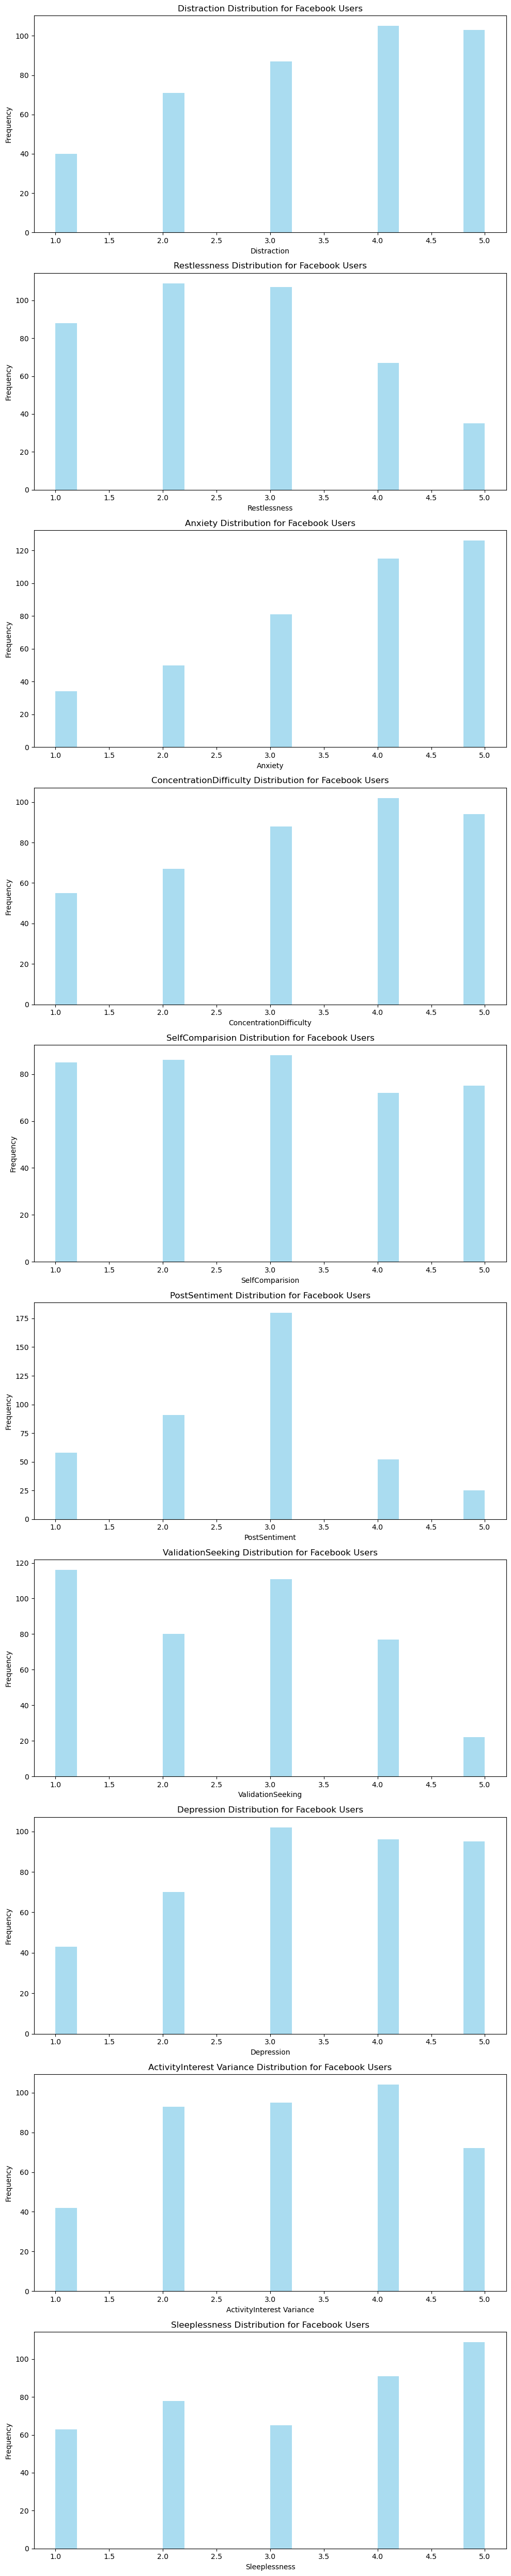

In [18]:
import matplotlib.pyplot as plt

# Define the mental health columns
mental_health_columns = ['Distraction', 'Restlessness', 'Anxiety', 
                         'ConcentrationDifficulty', 'SelfComparision', 
                         'PostSentiment', 'ValidationSeeking', 'Depression', 
                         'ActivityInterest Variance', 'Sleeplessness']

# Create subplots for each mental health column
fig, axes = plt.subplots(len(mental_health_columns), 1, figsize=(10, 5 * len(mental_health_columns)))

# Plot each mental health column for Facebook users
for i, column in enumerate(mental_health_columns):
    ax = axes[i]
    ax.hist(facebook_users[column], bins=20, color='skyblue', alpha=0.7)
    ax.set_title(f'{column} Distribution for Facebook Users')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()